# My first notebook working on create a agent for running some games

## Preparation
Install xvfb
```shell
$sudo apt install xvfb
```

Download and install latest anaconda.

create your python environment:
```shell
$conda create --name ohai python=3.6
```

Activate it
```shell
$source activate ohai
```

Clone this repository

Then run in your cloned folder
```shell
$cd ohai
$./start.sh
```

Open this notebook

Run the first code block (only once) to install neccessaries packages (depends on your internet connection, this might take a while)

In [1]:
import sys
!{sys.executable} -m pip install msgpack seaborn gym-retro Pillow keras tensorflow opencv-python pandas matplotlib scipy JSAnimation

Find and download the rom you wanna work base on the sha find on retro git (branch develop for more games).
Example for Contra rom: https://github.com/openai/retro/blob/master/data/SonicTheHedgehog2-Genesis/rom.sha.

Download the rom and put it into roms folder. Then run below code:

In [2]:
!{sys.executable} -m retro.import roms

Importing 4 potential games...
Importing Bikermice-Snes
Importing Contra-Nes
Importing ContraForce-Nes
Importing SonicTheHedgehog2-Genesis
Imported 4 games


WIP I: Here we import real packages for our work.

In [3]:
import retro
import cv2
import os
import time
import matplotlib.pyplot as plt
%matplotlib inline

# Imports specifically so we can render outputs in Jupyter.
from JSAnimation.IPython_display import display_animation
from matplotlib import animation
from IPython import display

def display_frames_as_gif(frames):
    """
    Displays a list of frames as a gif, with controls
    """
    patch = plt.imshow(frames[0])
    plt.axis('off')
    
    def animate(i):
        patch.set_data(frames[i])
    
    anim = animation.FuncAnimation(plt.gcf(), animate, frames = len(frames), interval=50)
    display.display(display_animation(anim, default_mode='loop'))

def show_state(env, step=0):
    plt.figure(3)
    plt.clf()
    plt.imshow(env.render(mode='rgb_array'))
    plt.axis('off')
    plt.title("%s - %s. Step: %d" % (env.gamename, env.statename,step))
    
#     plt.pause(0.001)  # pause for plots to update

    #if is_ipython:
    display.display(plt.gcf())
    display.clear_output(wait=True)
#     time.sleep(0.000)

The very first run, I also try to stop the env when having a KeyboardInterrupt Exception. For now, we can stop it by click on `Stop` button of this notebook.


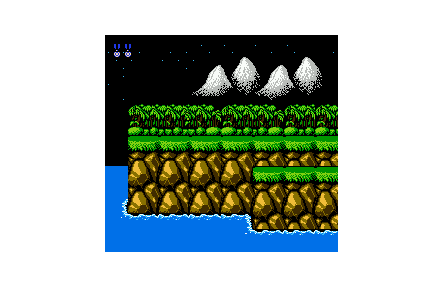
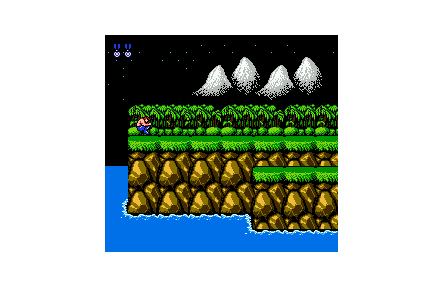
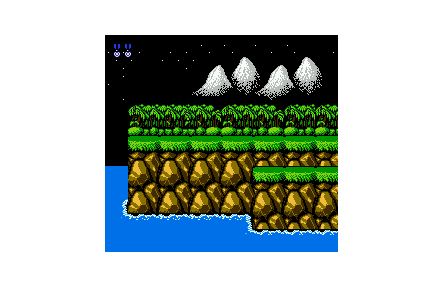
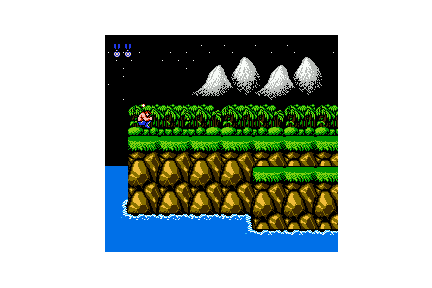
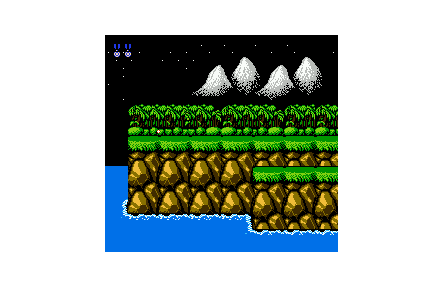
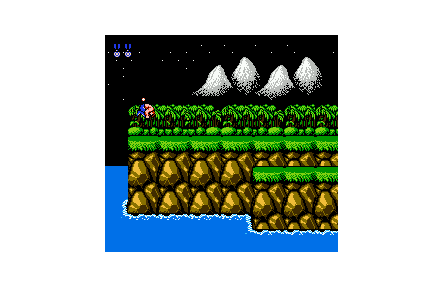
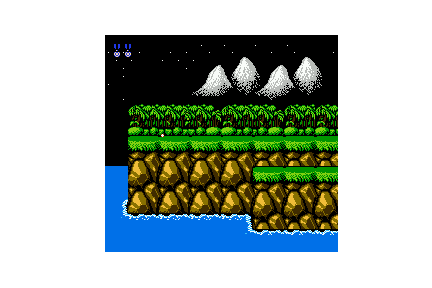
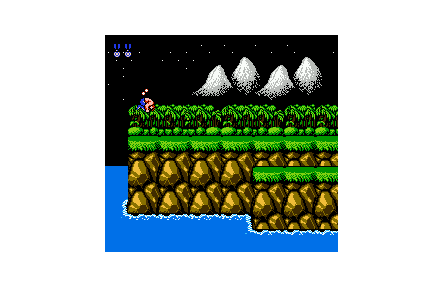
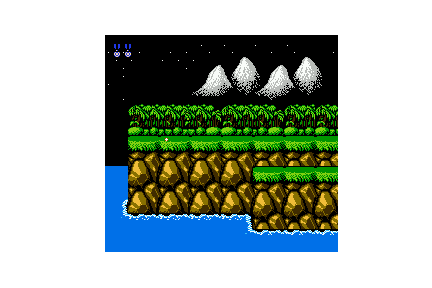
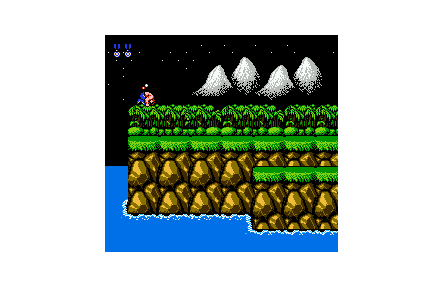
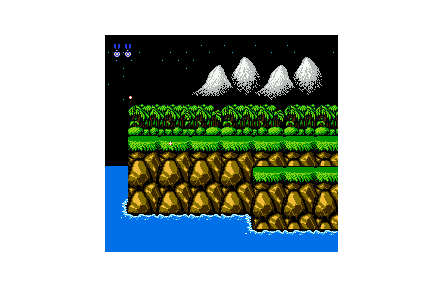
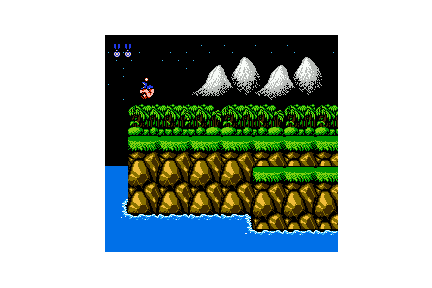
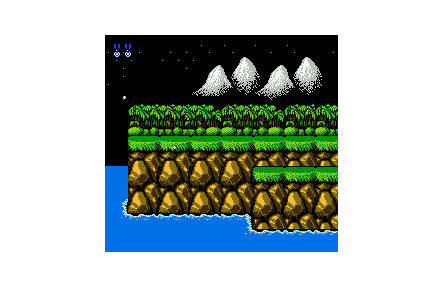
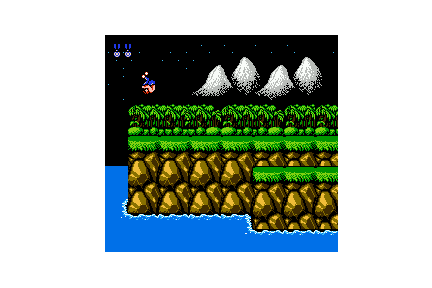
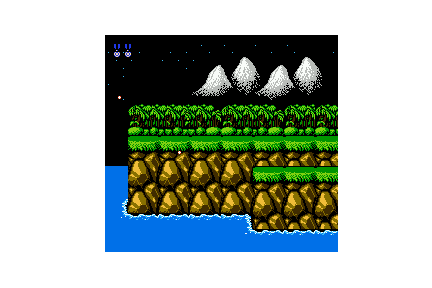
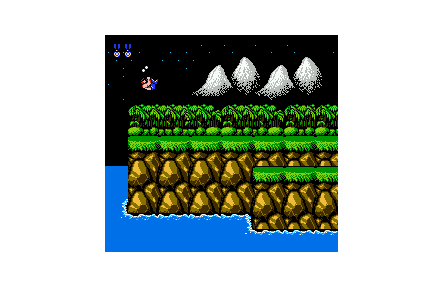
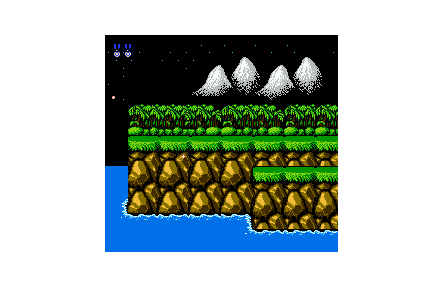
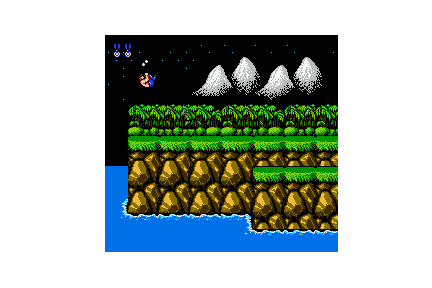
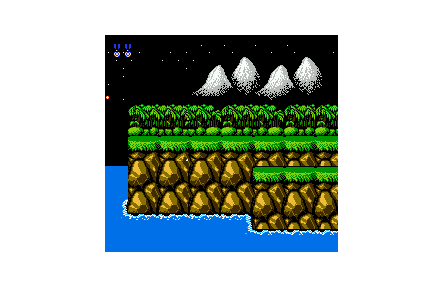
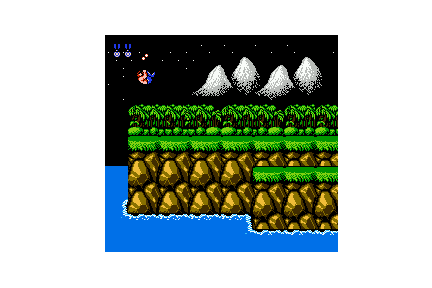
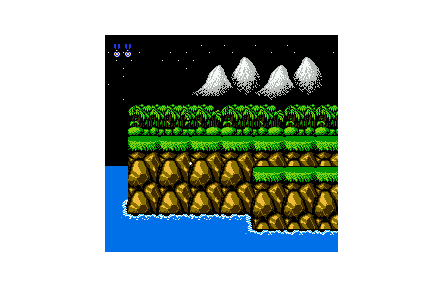
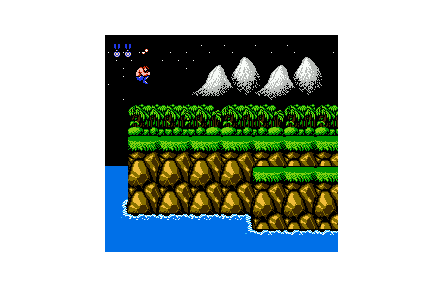
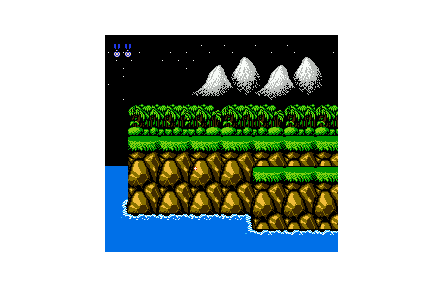
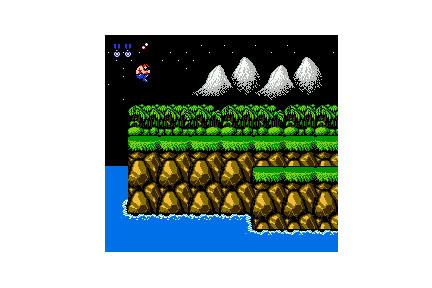
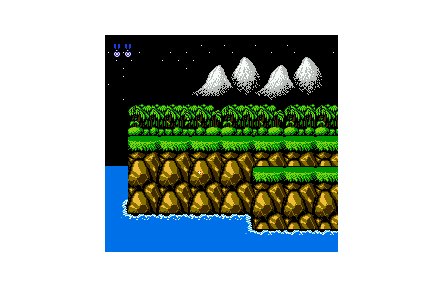
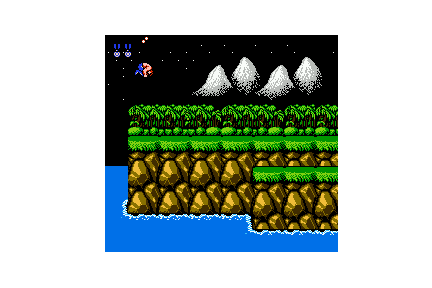
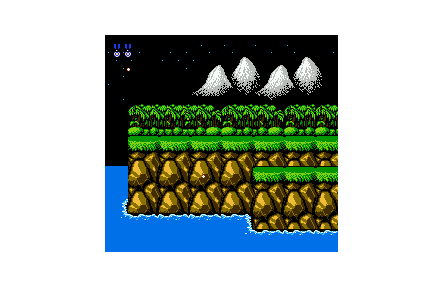
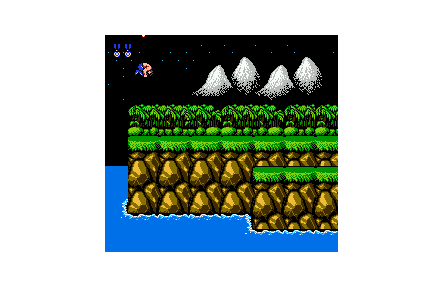
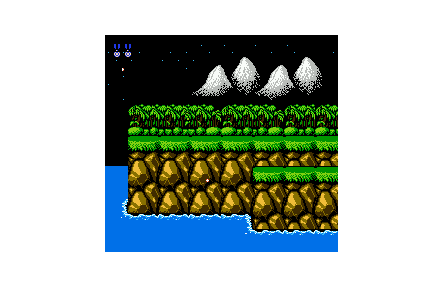
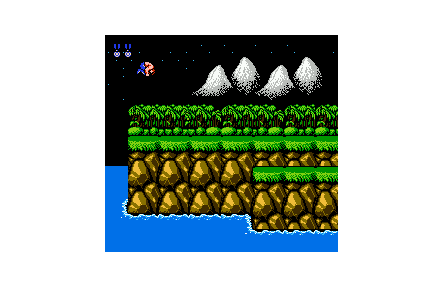
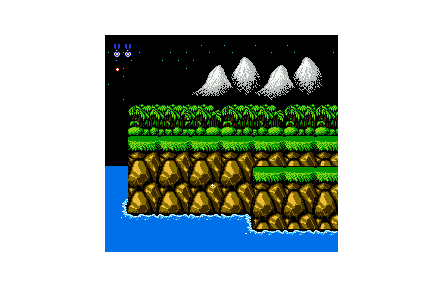
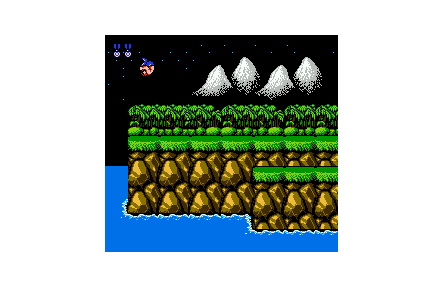
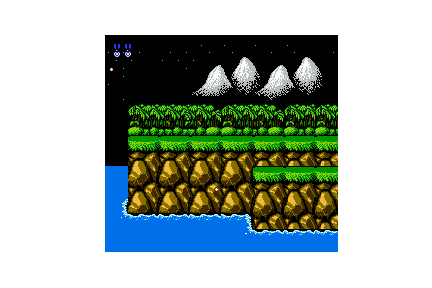
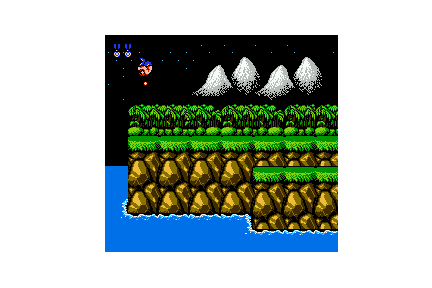
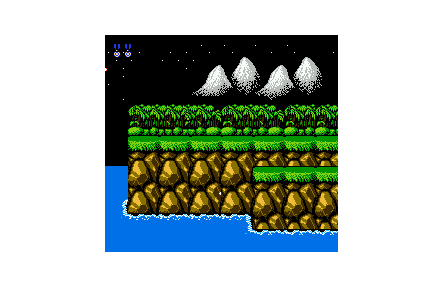
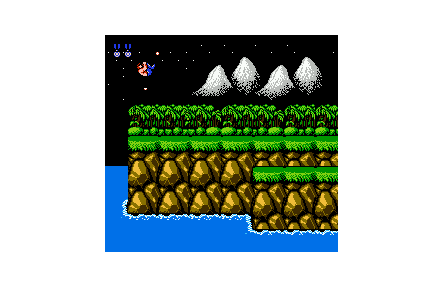
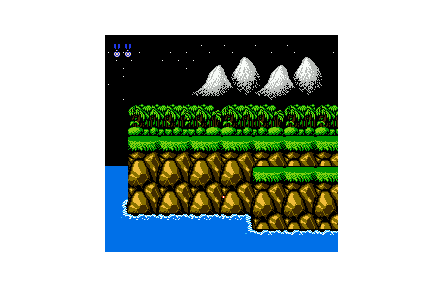
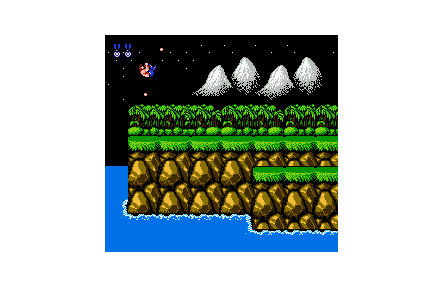
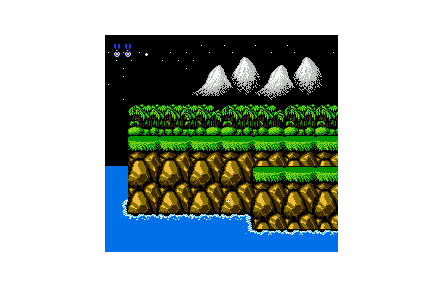
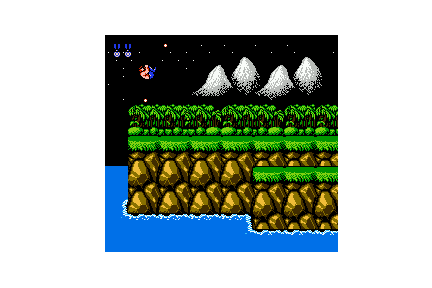
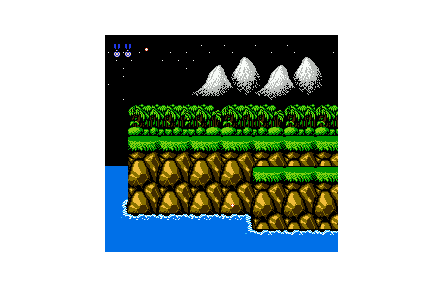
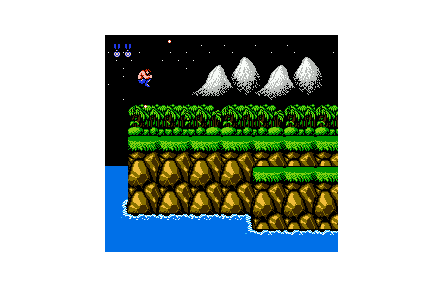
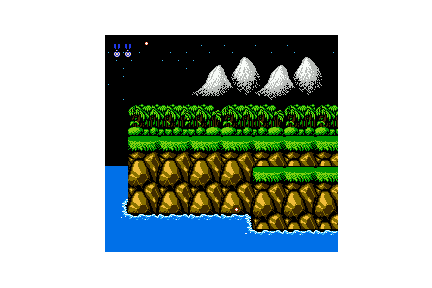
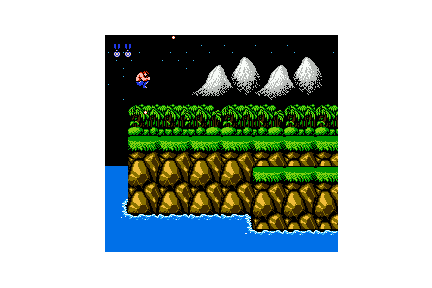
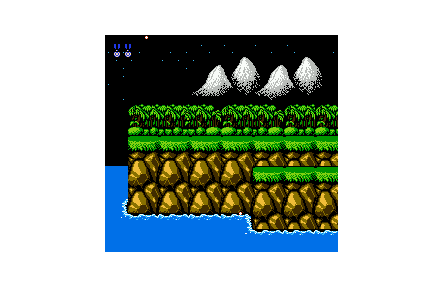
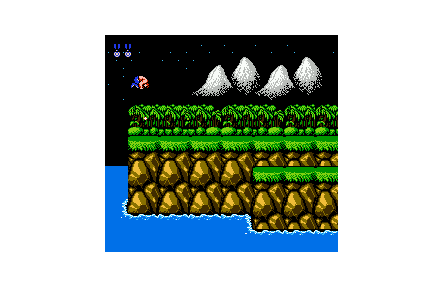
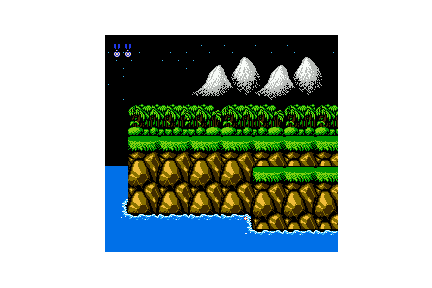
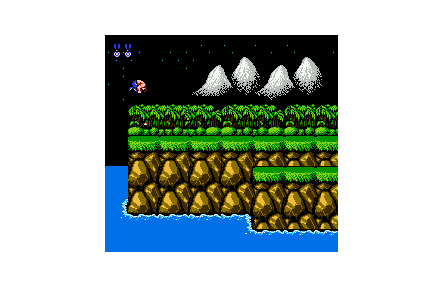
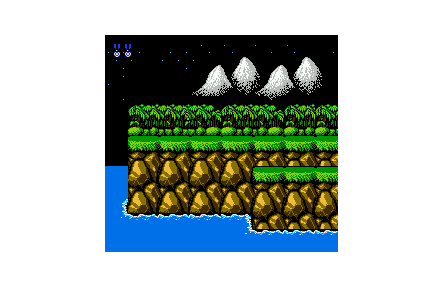
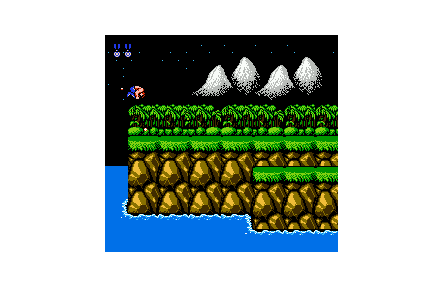
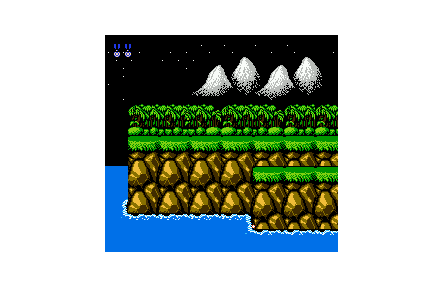
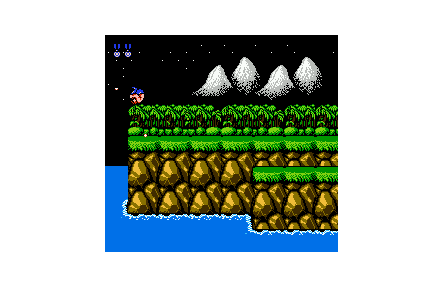
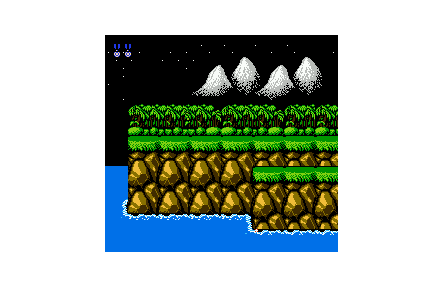
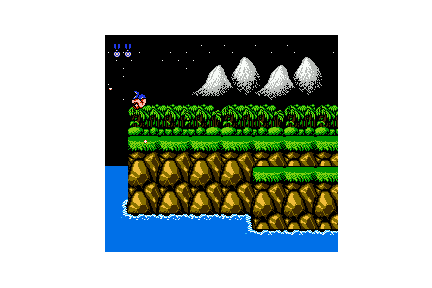
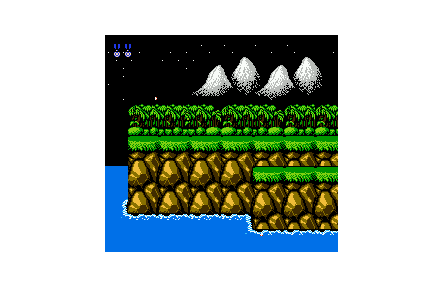
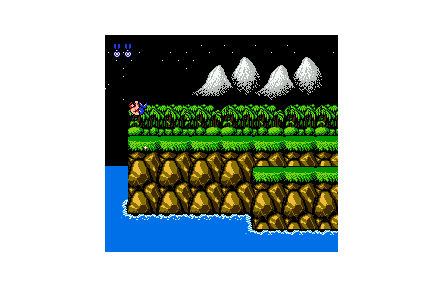
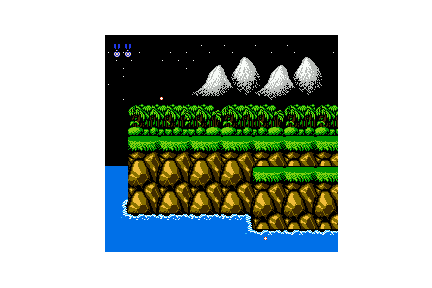
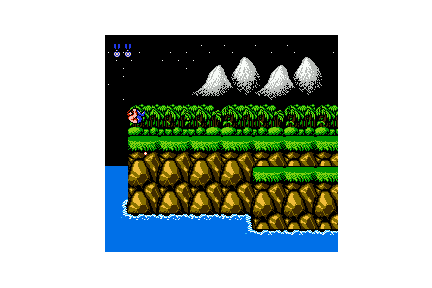
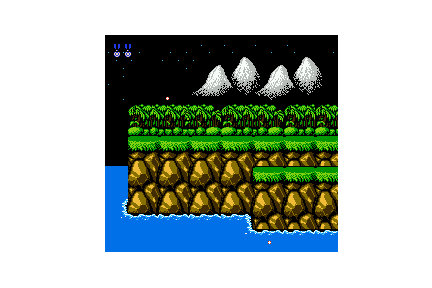
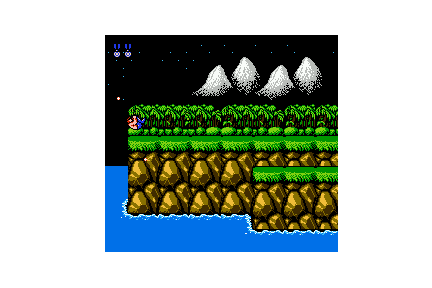
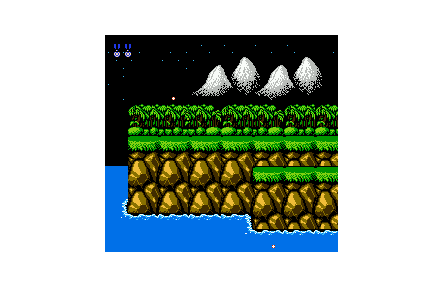
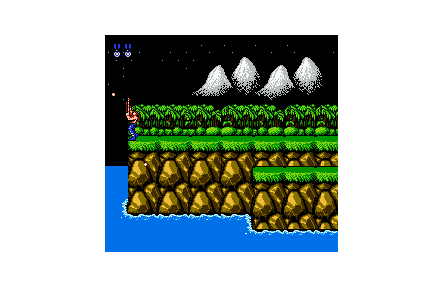
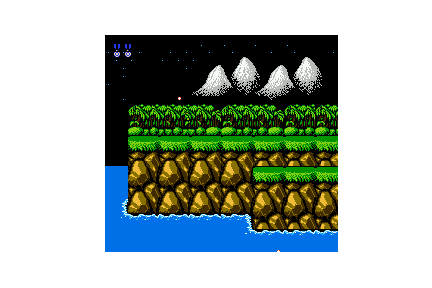
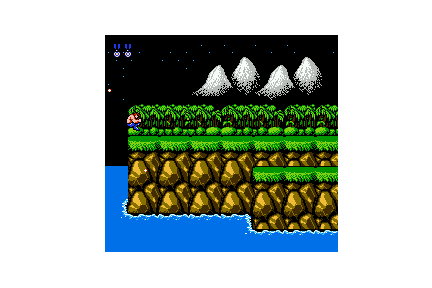
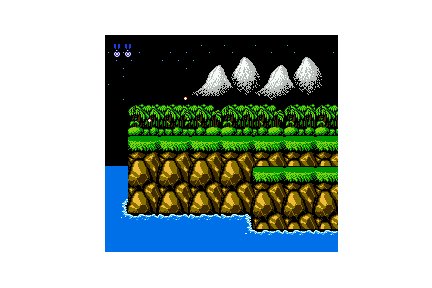
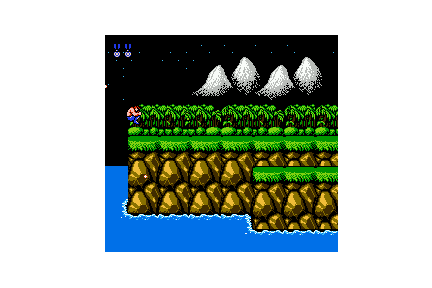
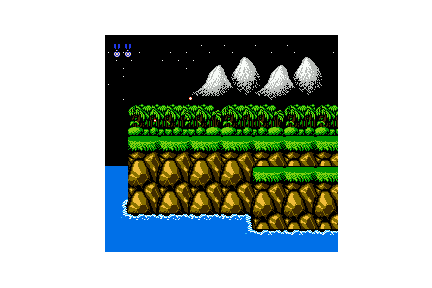
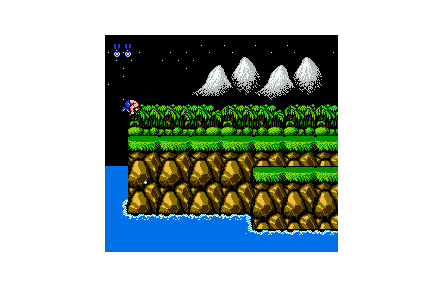
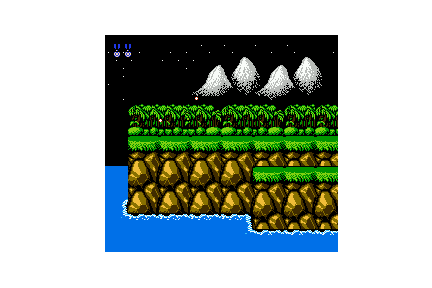
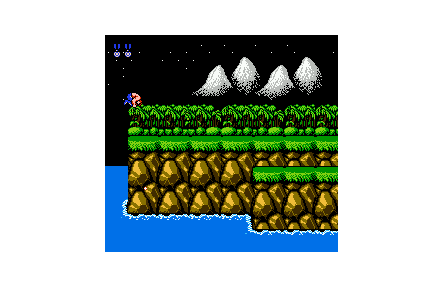
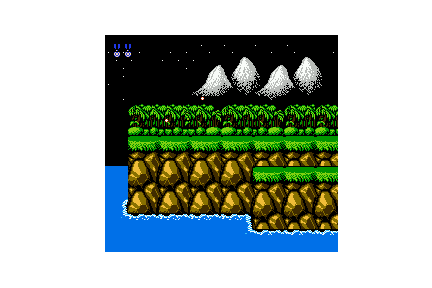
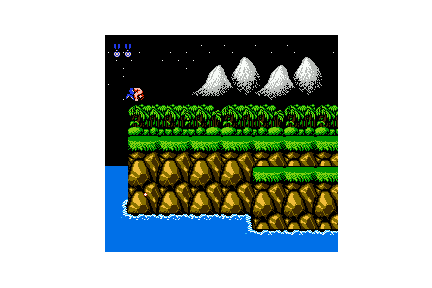
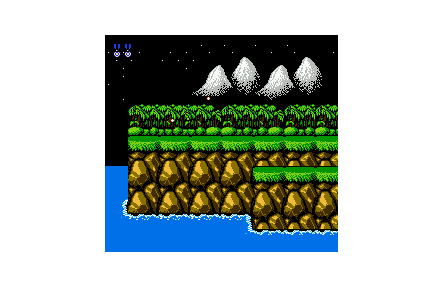
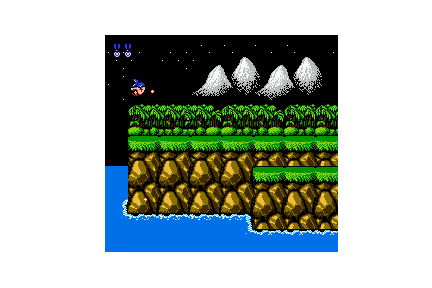
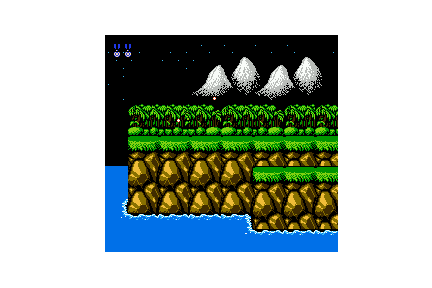
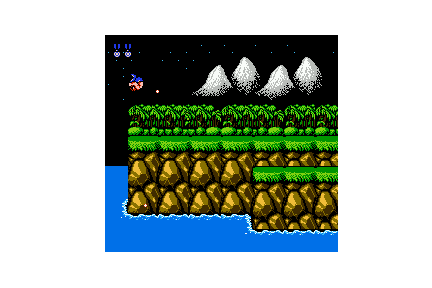
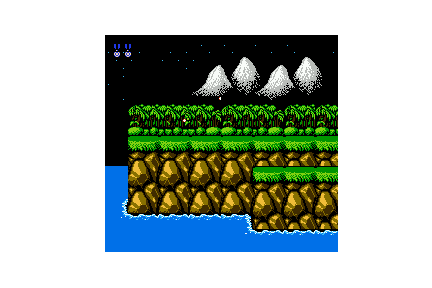
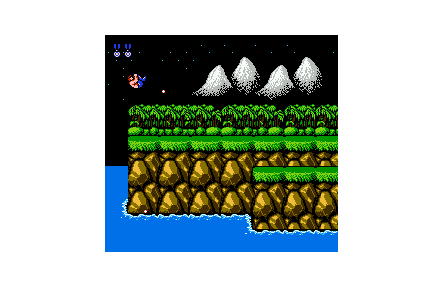
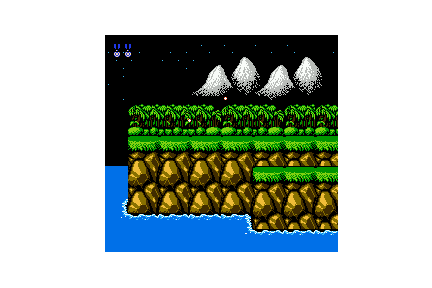
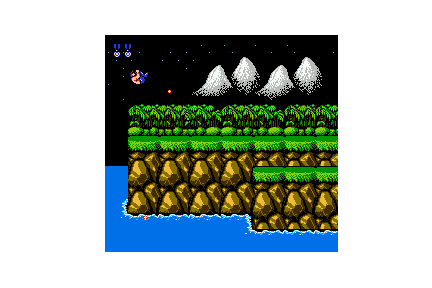
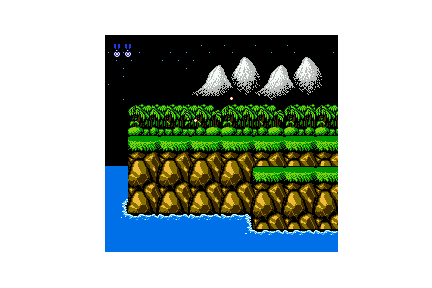
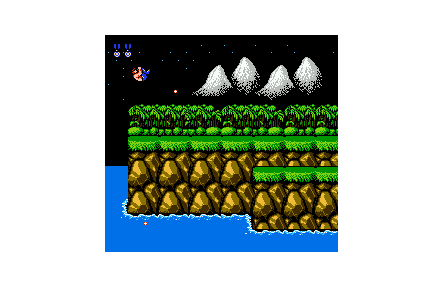
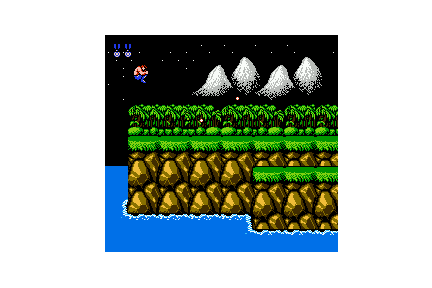
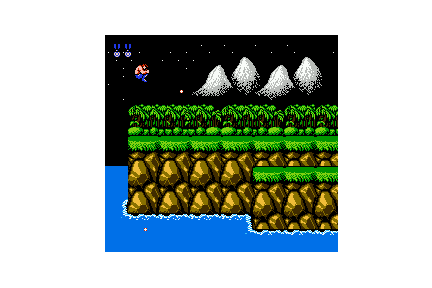
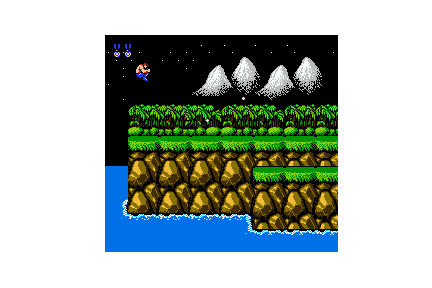
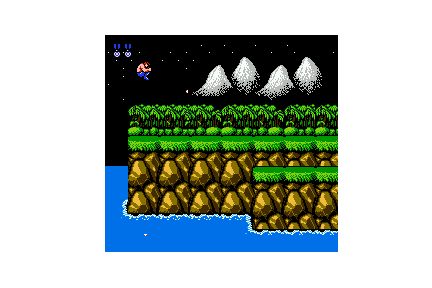
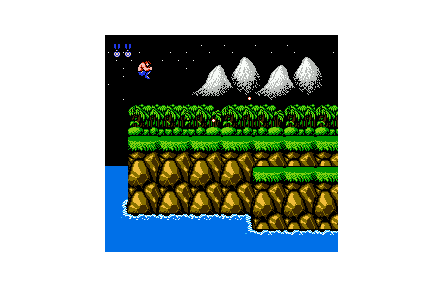
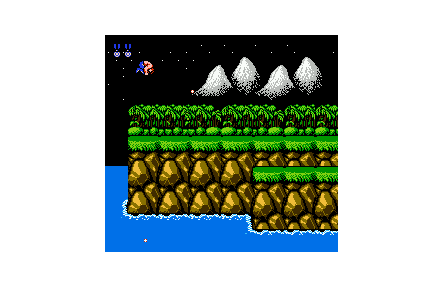
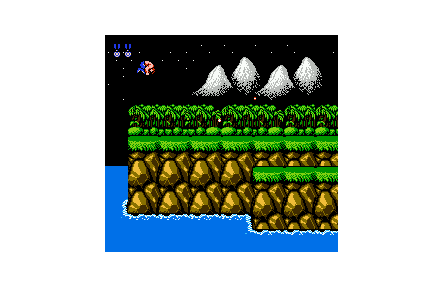
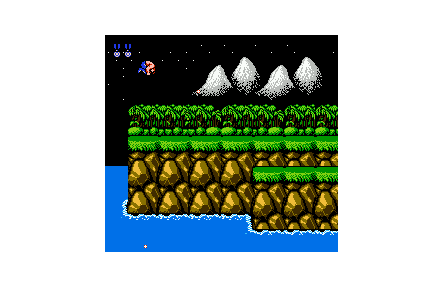
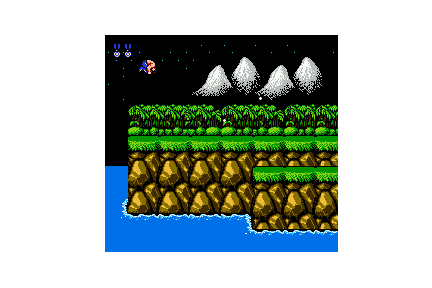
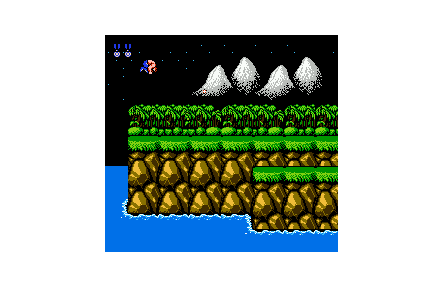
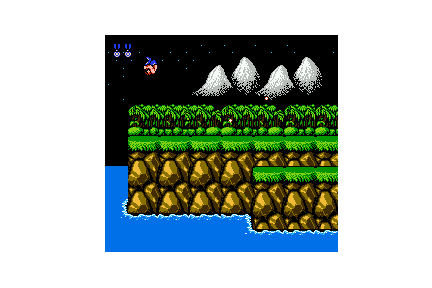
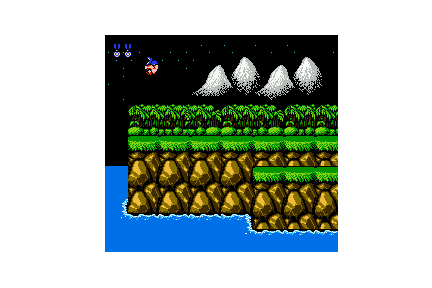
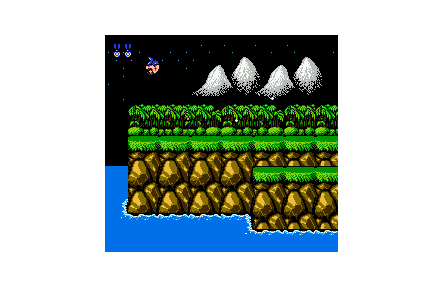
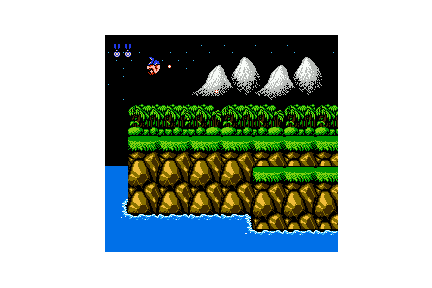
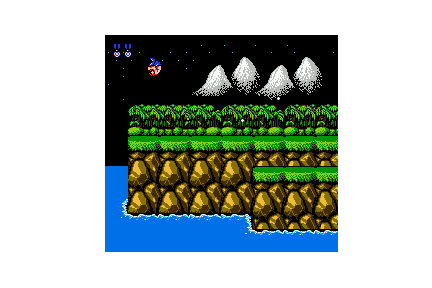
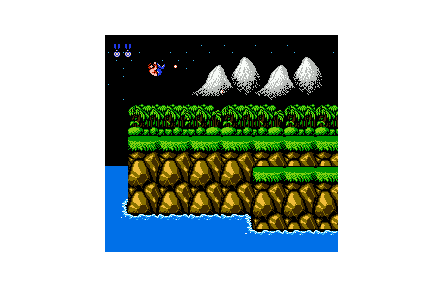
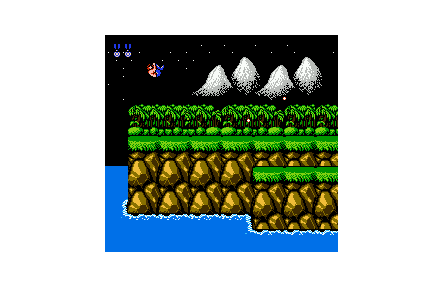
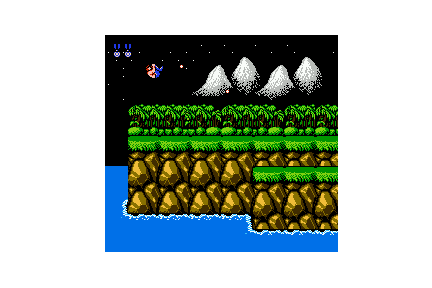

In [5]:
def main():
    env = retro.make(game='Contra-Nes', state='Level1', inttype=retro.data.Integrations.ALL)
    obs = env.reset()
    frames = []
    try:
        for step in range(100):
            obs, rew, done, info = env.step(env.action_space.sample())
            frames.append(env.render(mode = 'rgb_array'))
#             show_state(env,step)
            if done:
                obs = env.reset()
                break
        env.render(close=True)
    except KeyboardInterrupt as exc:
        print('Stopped by me. Me not an exception :D', exc)
        env.close()
    display_frames_as_gif(frames)

if __name__ == '__main__':
    main()